In [1]:
import pandas as pnd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from numpy.polynomial import Polynomial


In [2]:
#a
ex_a_dataframe = pnd.read_csv('ex_a.csv')
ex_a = ex_a_dataframe.to_numpy()
ex_a_x = ex_a[:, 0]
ex_a_y = ex_a[:, 1]


FileNotFoundError: [Errno 2] No such file or directory: 'ex_a.csv'

In [ ]:
ex_a_fit = Polynomial.fit(ex_a_x, ex_a_y, 6)
#A = ex_a_fit.coef
#A_t =A[np.newaxis]
#A_t = np.transpose(A_t)
#print(A_t)
print('fitting_polynomial is ', ex_a_fit)

fitting_polynomial is  0.14491445068359401 - 0.11821231717930507·x¹ + 0.22073622242838528·x² +
0.050932567335008526·x³ - 0.9287669031575522·x⁴ + 0.05798566505408666·x⁵ +
0.6533617300455736·x⁶


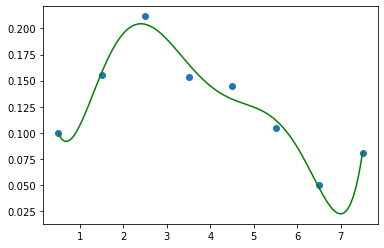

In [ ]:
x_a_fit, y_a_fit = ex_a_fit.linspace()
plt.plot(x_a_fit, y_a_fit, 'g')
plt.scatter(ex_a_x, ex_a_y)

In [ ]:
#c
ex_c_dataframe = pnd.read_csv('ex_c.csv')
ex_c = ex_c_dataframe.to_numpy()
ex_c_x = ex_c[:, 0]
ex_c_y_all = (ex_c[:, 1:51])
ex_c_y = np.mean(ex_c_y_all, axis=1)
#print(ex_c_y)

#print(np.size(ex_c_x), np.size(ex_c_y))

In [ ]:
#plt.scatter(ex_c_x, ex_c_y)

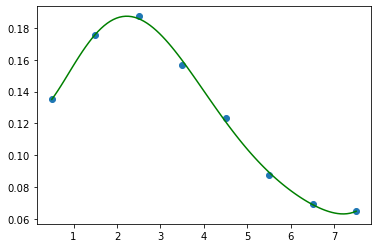

In [ ]:
ex_c_fit = Polynomial.fit(ex_c_x, ex_c_y, 6)
x_c_fit, y_c_fit = ex_c_fit.linspace()
plt.plot(x_c_fit, y_c_fit, 'g')
plt.scatter(ex_c_x, ex_c_y)


In [ ]:
#b



C = np.eye(7, k=1) - 2*np.eye(7) + np.eye(7, k=-1)
C[0,0] = -1
C[6,6] = -1
lambd = 10

funcs = [np.ones_like, x, x**2,x**3, x**4,x**5, x**6]
def jacobi_matrix(funcs, x):
    '''Create the design matrix for a linear least squares problem'''
    return np.column_stack([f(x) for f in funcs])


A = jacobi_matrix(funcs, ex_a_x)
print("Jacobi Matrix",A)
#A[:5]
A_t = np.transpose(A)


CA = np.matmul(C, A)
CA_t = np.transpose(CA)
CA_2 = lambd*np.matmul(CA_t, CA)

AA = np.matmul(A_t,A)
A_temp = 1 / (AA + CA_2)
#print(A_temp)
a_reg = np.flipud(A_temp*A_t)

#print(a_reg)
a_reg = np.squeeze(a_reg)
#for i in range(0, 6):
#    a_reg[i] = a_reg[i]*ex_a_fit.coef[i]

polynom = Polynomial(a_reg)

print(polynom)


0.011151445814337378 + 0.0009896875989566457·x¹ -
0.015852005586536176·x² + 0.0008693067541342221·x³ +
0.003767481183049953·x⁴ - 0.0020176239118265063·x⁵ +
0.0024733705238594926·x⁶


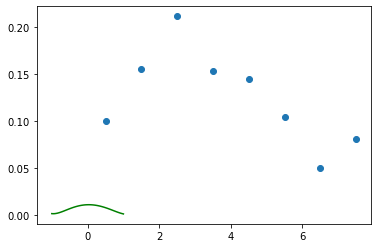

In [ ]:
x_a_reg, y_a_reg = polynom.linspace()
plt.plot(x_a_reg, y_a_reg, 'g')
plt.scatter(ex_a_x, ex_a_y)